In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
trans = pd.read_csv('../data/transactions.csv')

In [7]:
train.head()

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0


In [9]:
trans.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30


In [13]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   doj                 object 
 1   doi                 object 
 2   srcid               int64  
 3   destid              int64  
 4   srcid_region        object 
 5   destid_region       object 
 6   srcid_tier          object 
 7   destid_tier         object 
 8   cumsum_seatcount    float64
 9   cumsum_searchcount  float64
 10  dbd                 int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 190.2+ MB


In [19]:
trans.describe(include = "all")

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
count,2266100,2266100,2.266100e+06,2.266100e+06,2266100,2266100,2266100,2266100,2.266100e+06,2.266100e+06,2.266100e+06
unique,731,761,NaN,NaN,10,10,4,4,NaN,NaN,NaN
top,2023-03-01,2024-02-14,NaN,NaN,Tamil Nadu,Tamil Nadu,Tier 1,Tier 1,NaN,NaN,NaN
freq,3100,3100,NaN,NaN,543864,543864,1336999,1269016,NaN,NaN,NaN
mean,NaN,NaN,2.955000e+01,2.975000e+01,NaN,NaN,NaN,NaN,1.738379e+02,4.742158e+03,1.500000e+01
std,NaN,NaN,1.666996e+01,1.593887e+01,NaN,NaN,NaN,NaN,4.858925e+02,1.673550e+04,8.944274e+00
min,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1.475000e+01,1.575000e+01,NaN,NaN,NaN,NaN,0.000000e+00,2.080000e+02,7.000000e+00
50%,NaN,NaN,3.600000e+01,3.450000e+01,NaN,NaN,NaN,NaN,1.600000e+01,7.640000e+02,1.500000e+01
75%,NaN,NaN,4.500000e+01,4.500000e+01,NaN,NaN,NaN,NaN,1.000000e+02,2.896000e+03,2.300000e+01


In [25]:
# Check shapes and nulls
print("Train shape:", train.shape)
print("Transactions shape:", trans.shape)
print(train.isnull().sum())
print(trans.isnull().sum())

Train shape: (67200, 4)
Transactions shape: (2266100, 11)
doj                0
srcid              0
destid             0
final_seatcount    0
dtype: int64
doj                   0
doi                   0
srcid                 0
destid                0
srcid_region          0
destid_region         0
srcid_tier            0
destid_tier           0
cumsum_seatcount      0
cumsum_searchcount    0
dbd                   0
dtype: int64


In [27]:
# Convert date columns
trans['doj'] = pd.to_datetime(trans['doj'])
trans['doi'] = pd.to_datetime(trans['doi'])

# Optional: convert to category to save memory and improve speed
cat_cols = ['srcid_region', 'destid_region', 'srcid_tier', 'destid_tier']
for col in cat_cols:
    trans[col] = trans[col].astype('category')

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   doj                 datetime64[ns]
 1   doi                 datetime64[ns]
 2   srcid               int64         
 3   destid              int64         
 4   srcid_region        category      
 5   destid_region       category      
 6   srcid_tier          category      
 7   destid_tier         category      
 8   cumsum_seatcount    float64       
 9   cumsum_searchcount  float64       
 10  dbd                 int64         
dtypes: category(4), datetime64[ns](2), float64(2), int64(3)
memory usage: 129.7 MB


In [31]:
dbd_15 = trans[trans['dbd'] == 15].copy()

In [33]:
# Convert date column to datetime
train['doj'] = pd.to_datetime(train['doj'])

# Also convert for filtered dbd_15
dbd_15['doj'] = pd.to_datetime(dbd_15['doj'])

# Merge on srcid, destid, doj to get final_seatcount (the target)
train_merged = pd.merge(dbd_15, train, on=['doj', 'srcid', 'destid'], how='left')

In [35]:
train_merged.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seatcount
0,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,15,2838.0
1,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,15,2298.0
2,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,15,2720.0
3,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,15,2580.0
4,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,15,4185.0


In [37]:
train_merged.isnull().sum()

doj                      0
doi                      0
srcid                    0
destid                   0
srcid_region             0
destid_region            0
srcid_tier               0
destid_tier              0
cumsum_seatcount         0
cumsum_searchcount       0
dbd                      0
final_seatcount       5900
dtype: int64

In [41]:
#diagnosis for null values
missing_rows = dbd_15[~dbd_15.set_index(['doj', 'srcid', 'destid']).index
                      .isin(train.set_index(['doj', 'srcid', 'destid']).index)]

missing_rows.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
2084700,2025-01-01,2024-12-17,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,250.0,6850.0,15
2084701,2025-01-01,2024-12-17,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,320.0,7246.0,15
2084702,2025-01-01,2024-12-17,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,240.0,5718.0,15
2084703,2025-01-01,2024-12-17,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,384.0,11298.0,15
2084704,2025-01-01,2024-12-17,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,99.0,4767.0,15


In [43]:
train_merged = train_merged.dropna(subset=['final_seatcount'])
print("Training rows after dropping nulls:", len(train_merged))

Training rows after dropping nulls: 67200


In [208]:
train_merged['weekday'] = train_merged['doj'].dt.dayofweek
train_merged['month'] = train_merged['doj'].dt.month

# Rename to make it clear these are 15-day-before features
train_merged.rename(columns={
    'cumsum_seatcount': 'seats_15_days_before',
    'cumsum_searchcount': 'searches_15_days_before'
}, inplace=True)

# Add derived feature
train_merged['search_to_seat_ratio'] = train_merged['searches_15_days_before'] / (train_merged['seats_15_days_before'] + 1e-5)

# Average bookings per route-month
route_month_avg = train_merged.groupby(['srcid', 'destid', 'month'])['final_seatcount'].mean().reset_index()
route_month_avg.rename(columns={'final_seatcount': 'route_month_avg'}, inplace=True)

# Average bookings per route-weekday
route_weekday_avg = train_merged.groupby(['srcid', 'destid', 'weekday'])['final_seatcount'].mean().reset_index()
route_weekday_avg.rename(columns={'final_seatcount': 'route_weekday_avg'}, inplace=True)

train_merged = train_merged.merge(route_month_avg, on=['srcid', 'destid', 'month'], how='left')
train_merged = train_merged.merge(route_weekday_avg, on=['srcid', 'destid', 'weekday'], how='left')

In [210]:
train_merged.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,seats_15_days_before,searches_15_days_before,...,same_tier,is_school_vacation,is_src_region_holiday,is_dest_region_holiday,is_any_region_holiday,is_diwali_week,is_festival_cluster_state,search_to_seat_ratio,route_month_avg,route_weekday_avg
0,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,...,1,0,0,0,0,0,0,29.999981,3646.870968,3678.187500
1,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,...,1,0,0,0,0,0,0,10.352938,3399.419355,3670.145833
2,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,...,1,0,0,0,0,0,0,24.777771,3521.709677,3831.562500
3,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,...,1,0,0,0,0,0,0,62.777743,3387.451613,3549.437500
4,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,...,0,0,0,0,0,0,0,21.312496,4410.919355,4707.468750


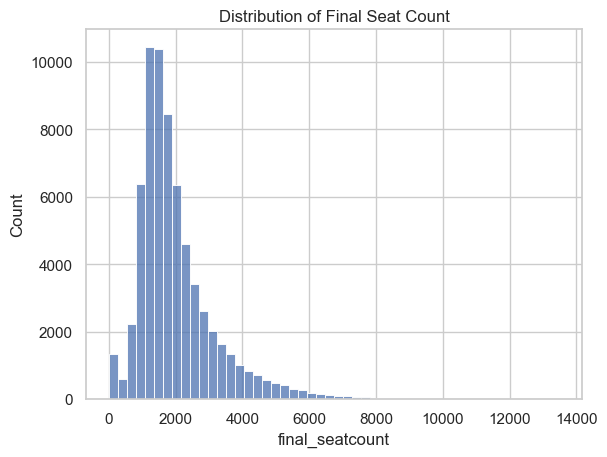

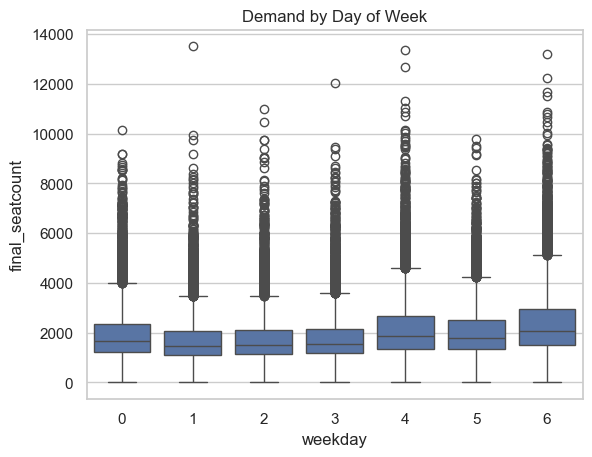

,doj,srcid_region,destid_region,final_seatcount
60806,2024-10-29,Tamil Nadu,Tamil Nadu,13503.0
25420,2023-11-10,Delhi,Rest of North,13364.0
61307,2024-11-03,Tamil Nadu,Tamil Nadu,13200.0
25406,2023-11-10,Tamil Nadu,Tamil Nadu,12684.0
61305,2024-11-03,Tamil Nadu,Tamil Nadu,12219.0


In [152]:
# Demand distribution
sns.histplot(train_merged['final_seatcount'], bins=50)
plt.title("Distribution of Final Seat Count")
plt.show()

# Demand by weekday
sns.boxplot(x='weekday', y='final_seatcount', data=train_merged)
plt.title("Demand by Day of Week")
plt.show()

train_merged.groupby('weekday')['final_seatcount'].describe()

outliers = train_merged[train_merged['final_seatcount'] > train_merged['final_seatcount'].quantile(0.99)]
outliers[['doj', 'srcid_region', 'destid_region', 'final_seatcount']].sort_values(by='final_seatcount', ascending=False).head()


In [55]:
# Ensure doj is datetime type
train_merged['doj'] = pd.to_datetime(train_merged['doj'])

# Extract year
train_merged['doj_year'] = train_merged['doj'].dt.year

# Number of distinct years
distinct_years = train_merged['doj_year'].nunique()
print("Number of distinct years:", distinct_years)

# See which years are present
print("Years in data:", train_merged['doj_year'].unique())

Number of distinct years: 2
Years in data: [2023 2024]


In [180]:
!pip install holidays
import holidays
import pandas as pd

# Use India holidays from the library
indian_holidays = holidays.India(years=[2023, 2024])  # include relevant years

# is_holiday
train_merged['is_holiday'] = train_merged['doj'].dt.date.isin(indian_holidays).astype(int)

# is_day_before_holiday
train_merged['is_day_before_holiday'] = train_merged['doj'].apply(lambda x: (x + pd.Timedelta(days=1)) in indian_holidays).astype(int)

# is_long_weekend: holiday on Friday or Monday
train_merged['is_long_weekend'] = train_merged['doj'].apply(
    lambda x: ((x - pd.Timedelta(days=1)) in indian_holidays and x.weekday() == 5) or  # Saturday after Friday holiday
              ((x + pd.Timedelta(days=1)) in indian_holidays and x.weekday() == 4) or  # Friday before Saturday holiday
              ((x - pd.Timedelta(days=2)) in indian_holidays and x.weekday() == 6) or  # Sunday after Friday holiday
              ((x + pd.Timedelta(days=2)) in indian_holidays and x.weekday() == 5)     # Saturday before Monday holiday
).astype(int)

# Basic pan-India school vacation periods
train_merged['month'] = train_merged['doj'].dt.month
train_merged['is_school_vacation'] = train_merged['month'].isin([4, 5, 6, 10, 11, 12]).astype(int)

# Define Diwali dates
diwali_dates = [pd.Timestamp("2023-11-12"), pd.Timestamp("2024-11-01")]

# Create feature: is_diwali_week (±3 days)
train_merged['is_diwali_week'] = train_merged['doj'].apply(
    lambda x: any([(diwali - pd.Timedelta(days=3)) <= x <= (diwali + pd.Timedelta(days=3)) for diwali in diwali_dates])
).astype(int)

# Create feature: is_festival_cluster_state
train_merged['is_festival_cluster_state'] = train_merged.apply(
    lambda row: (
        (row['srcid_region'] in ['Tamil Nadu', 'Delhi'] or row['destid_region'] in ['Tamil Nadu', 'Delhi'])
        and row['doj'].month in [10, 11]
    ), axis=1
).astype(int)

In [182]:
train_merged.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,...,is_day_before_holiday,is_long_weekend,intra_region,same_tier,is_school_vacation,is_src_region_holiday,is_dest_region_holiday,is_any_region_holiday,is_diwali_week,is_festival_cluster_state
0,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,...,0,0,0,1,0,0,0,0,0,0
1,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,...,0,0,0,1,0,0,0,0,0,0
2,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,...,0,0,0,1,0,0,0,0,0,0
3,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,...,0,0,0,1,0,0,0,0,0,0
4,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,...,0,0,1,0,0,0,0,0,0,0


In [134]:
region_to_state = {
    'Tamil Nadu': 'Tamil Nadu',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Maharashtra and Goa': 'Maharashtra',
    'Karnataka': 'Karnataka',
    'Delhi': 'Delhi',
    'Rest of North': 'Uttar Pradesh',
    'East 1': 'West Bengal',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Rajasthan': 'Rajasthan',
    'Kerala': 'Kerala'
}

import holidays

def get_state_holidays(region_col, date_col):
    holiday_flags = []
    for region, date in zip(train_merged[region_col], train_merged[date_col]):
        state = region_to_state.get(region, None)
        if state:
            state_holidays = holidays.India(years=[2023, 2024], subdiv=state)
            holiday_flags.append(int(date in state_holidays))
        else:
            holiday_flags.append(0)
    return holiday_flags

# For source and destination regions
train_merged['is_src_region_holiday'] = get_state_holidays('srcid_region', 'doj')
train_merged['is_dest_region_holiday'] = get_state_holidays('destid_region', 'doj')

train_merged['is_any_region_holiday'] = train_merged[['is_src_region_holiday', 'is_dest_region_holiday']].max(axis=1)

train_merged.head()

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,...,doj_year,is_holiday,is_day_before_holiday,is_long_weekend,intra_region,same_tier,is_school_vacation,is_src_region_holiday,is_dest_region_holiday,is_any_region_holiday
0,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,...,2023,0,0,0,0,1,0,0,0,0
1,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,...,2023,0,0,0,0,1,0,0,0,0
2,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,...,2023,0,0,0,0,1,0,0,0,0
3,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,...,2023,0,0,0,0,1,0,0,0,0
4,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,...,2023,0,0,0,1,0,0,0,0,0


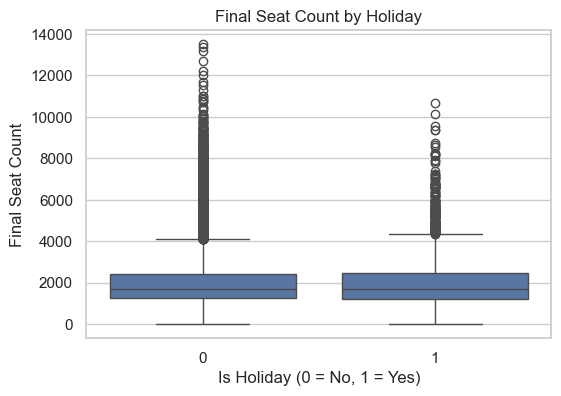

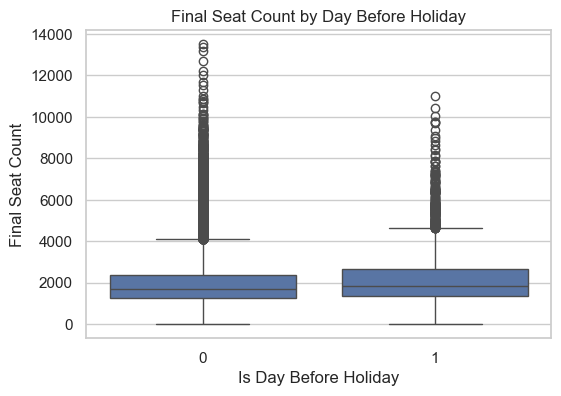

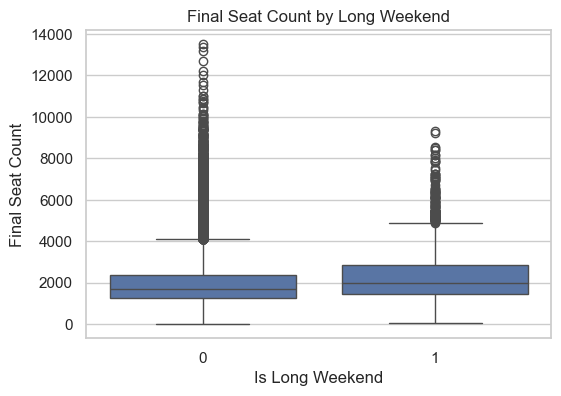

Holiday Effect:
            count        mean  median          std
is_holiday                                        
0           64200  1999.90285  1685.0  1189.318367
1            3000  2040.81900  1700.0  1304.387962 

Day Before Holiday Effect:
                       count         mean  median          std
is_day_before_holiday                                         
0                      64200  1991.949751  1680.0  1184.907992
1                       3000  2211.015333  1850.0  1371.612476 

Long Weekend Effect:
                 count         mean  median          std
is_long_weekend                                         
0                65100  1990.913948  1680.0  1188.746087
1                 2100  2337.010476  1996.0  1323.957706


In [71]:
# Set plot style
sns.set(style="whitegrid")

# Boxplot: is_holiday vs final_seatcount
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_holiday', y='final_seatcount', data=train_merged)
plt.title('Final Seat Count by Holiday')
plt.xlabel('Is Holiday (0 = No, 1 = Yes)')
plt.ylabel('Final Seat Count')
plt.show()

# Boxplot: is_day_before_holiday vs final_seatcount
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_day_before_holiday', y='final_seatcount', data=train_merged)
plt.title('Final Seat Count by Day Before Holiday')
plt.xlabel('Is Day Before Holiday')
plt.ylabel('Final Seat Count')
plt.show()

# Boxplot: is_long_weekend vs final_seatcount
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_long_weekend', y='final_seatcount', data=train_merged)
plt.title('Final Seat Count by Long Weekend')
plt.xlabel('Is Long Weekend')
plt.ylabel('Final Seat Count')
plt.show()

# Mean, median, and std grouped by is_holiday
print("Holiday Effect:")
print(train_merged.groupby('is_holiday')['final_seatcount'].agg(['count', 'mean', 'median', 'std']), '\n')

# Mean, median, and std grouped by is_day_before_holiday
print("Day Before Holiday Effect:")
print(train_merged.groupby('is_day_before_holiday')['final_seatcount'].agg(['count', 'mean', 'median', 'std']), '\n')

# Mean, median, and std grouped by is_long_weekend
print("Long Weekend Effect:")
print(train_merged.groupby('is_long_weekend')['final_seatcount'].agg(['count', 'mean', 'median', 'std']))


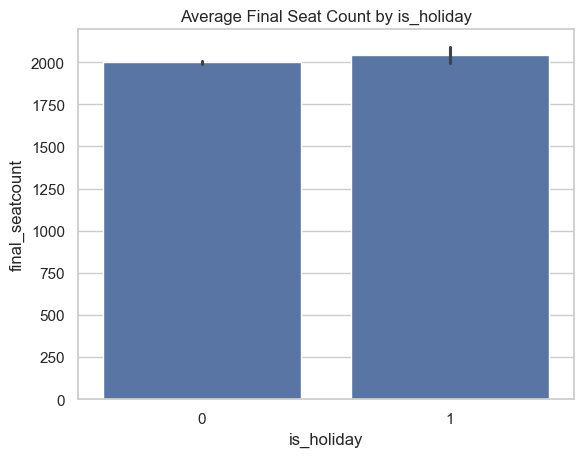

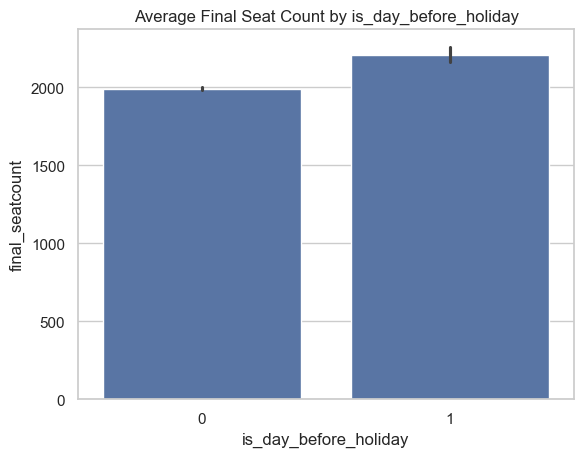

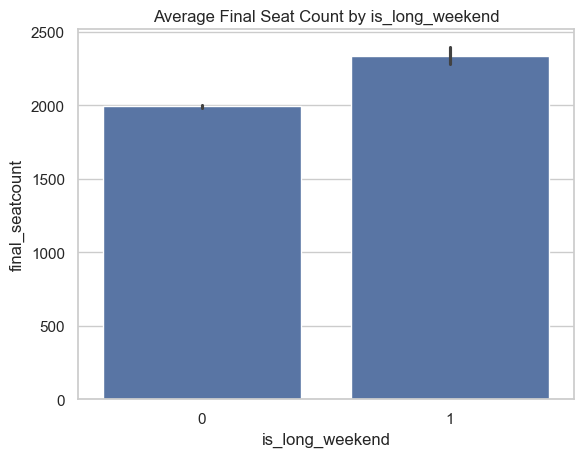

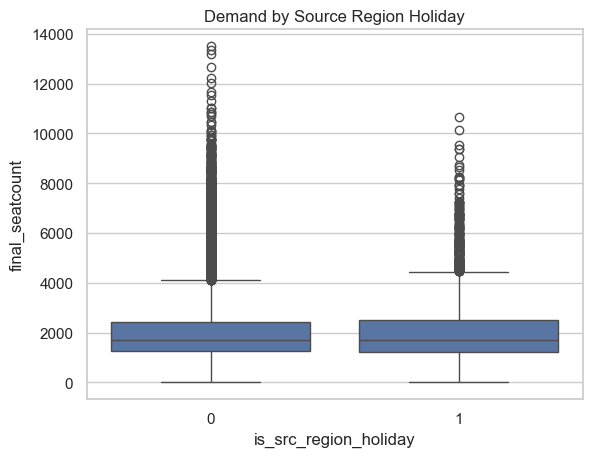

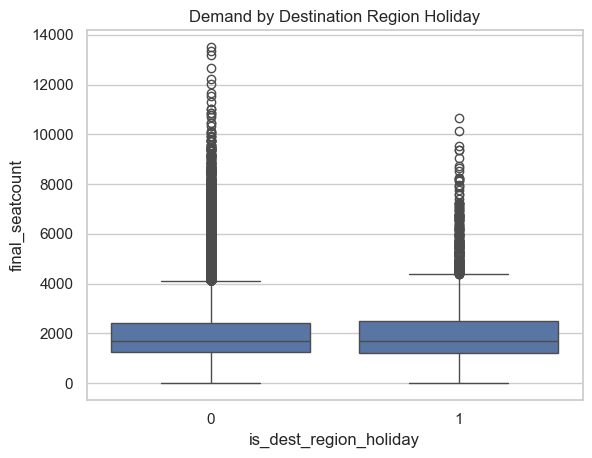

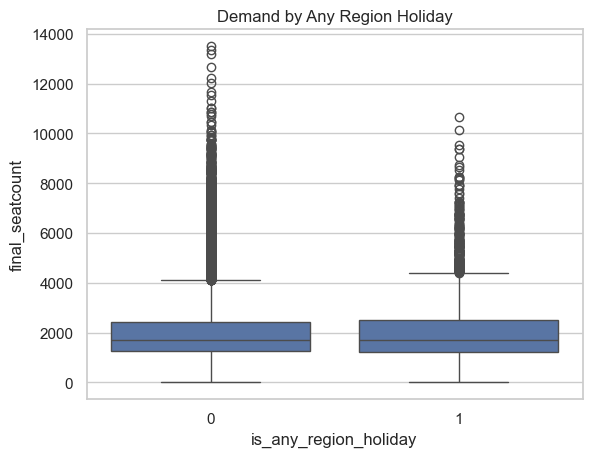

In [135]:
# Visual bar plot comparison of means
import seaborn as sns
import matplotlib.pyplot as plt

features = ['is_holiday', 'is_day_before_holiday', 'is_long_weekend']

for col in features:
    sns.barplot(x=col, y='final_seatcount', data=train_merged)
    plt.title(f'Average Final Seat Count by {col}')
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Source region holiday effect
sns.boxplot(x='is_src_region_holiday', y='final_seatcount', data=train_merged)
plt.title("Demand by Source Region Holiday")
plt.show()

# Destination region holiday effect
sns.boxplot(x='is_dest_region_holiday', y='final_seatcount', data=train_merged)
plt.title("Demand by Destination Region Holiday")
plt.show()

# Any region holiday effect
sns.boxplot(x='is_any_region_holiday', y='final_seatcount', data=train_merged)
plt.title("Demand by Any Region Holiday")
plt.show()


In [118]:
# Top Source Regions by Total Demand
src_region_demand = train_merged.groupby('srcid_region')['final_seatcount'].sum().sort_values(ascending=False)
print(src_region_demand)

# Top Destination Regions by Total Demand
dest_region_demand = train_merged.groupby('destid_region')['final_seatcount'].sum().sort_values(ascending=False)
print(dest_region_demand)

# Demand by Source Tier
print(train_merged.groupby('srcid_tier')['final_seatcount'].describe())

# Demand by Destination Tier
print(train_merged.groupby('destid_tier')['final_seatcount'].describe())

print("Source Region Holiday Effect:")
print(train_merged.groupby('is_src_region_holiday')['final_seatcount'].agg(['count', 'mean', 'median', 'std']), "\n")

print("Destination Region Holiday Effect:")
print(train_merged.groupby('is_dest_region_holiday')['final_seatcount'].agg(['count', 'mean', 'median', 'std']), "\n")

print("Any Region Holiday Effect:")
print(train_merged.groupby('is_any_region_holiday')['final_seatcount'].agg(['count', 'mean', 'median', 'std']))

srcid_region
Tamil Nadu             39724151.0
Andhra Pradesh         26011704.0
Maharashtra and Goa    21752605.0
Karnataka              18353237.0
Delhi                   7137105.0
Rest of North           6895326.0
East 1                  6725854.0
Madhya Pradesh          5300167.0
Rajasthan               1378316.0
Kerala                  1237755.0
Name: final_seatcount, dtype: float64
destid_region
Tamil Nadu             39959284.0
Andhra Pradesh         25086481.0
Maharashtra and Goa    23807180.0
Karnataka              17943092.0
Delhi                   8273642.0
East 1                  6725854.0
Rest of North           5982429.0
Madhya Pradesh          4324227.0
Kerala                  1259355.0
Rajasthan               1154676.0
Name: final_seatcount, dtype: float64
              count         mean          std    min     25%     50%     75%  \
srcid_tier                                                                     
Tier 1      39648.0  2099.182077  1203.110664    2.0  132

/var/folders/d1/z6988h613vvdthdkgbg645gw0000gn/T/ipykernel_54800/3957336124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  src_region_demand = train_merged.groupby('srcid_region')['final_seatcount'].sum().sort_values(ascending=False)
/var/folders/d1/z6988h613vvdthdkgbg645gw0000gn/T/ipykernel_54800/3957336124.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dest_region_demand = train_merged.groupby('destid_region')['final_seatcount'].sum().sort_values(ascending=False)
/var/folders/d1/z6988h613vvdthdkgbg645gw0000gn/T/ipykernel_54800/3957336124.py:10: FutureWarning: The default of observed=False is depre

In [109]:
train_merged['intra_region'] = (train_merged['srcid_region'] == train_merged['destid_region']).astype(int)

train_merged['same_tier'] = (train_merged['srcid_tier'] == train_merged['destid_tier']).astype(int)

In [111]:
train_merged[['final_seatcount', 'is_holiday', 'is_day_before_holiday', 
              'is_long_weekend', 'same_tier', 'intra_region']].corr()

,final_seatcount,is_holiday,is_day_before_holiday,is_long_weekend,same_tier,intra_region
final_seatcount,1.000000,7.072842e-03,3.786808e-02,5.040440e-02,8.889907e-02,2.572326e-02
is_holiday,0.007073,1.000000e+00,-4.672897e-02,-3.882507e-02,-2.398645e-17,-1.117251e-17
is_day_before_holiday,0.037868,-4.672897e-02,1.000000e+00,8.541516e-02,-3.920414e-17,1.458609e-18
is_long_weekend,0.050404,-3.882507e-02,8.541516e-02,1.000000e+00,9.676802e-17,8.219061e-17
same_tier,0.088899,-2.398645e-17,-3.920414e-17,9.676802e-17,1.000000e+00,-2.247962e-01
intra_region,0.025723,-1.117251e-17,1.458609e-18,8.219061e-17,-2.247962e-01,1.000000e+00


In [93]:
!pip install lightgbm
!pip install --upgrade lightgbm

In [212]:
features = [
    'route_month_avg',
    'route_weekday_avg',
    'seats_15_days_before',
    'searches_15_days_before',
    'search_to_seat_ratio',
    'weekday',
    'month',
    'is_holiday',
    'is_day_before_holiday',
    'is_long_weekend',
    'same_tier',
    'is_diwali_week',
    'is_school_vacation',
    'intra_region',
    'is_festival_cluster_state'  # Optional: include if you want to test its effect
]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np

X = train_merged[features]
y = train_merged['final_seatcount']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(
    objective='regression',
    n_estimators=100,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(0)]
)

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Improved RMSE: {rmse:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 53760, number of used features: 15
[LightGBM] [Info] Start training from score 2003.632533
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 443.482	valid_0's l2: 196676
Improved RMSE: 443.48


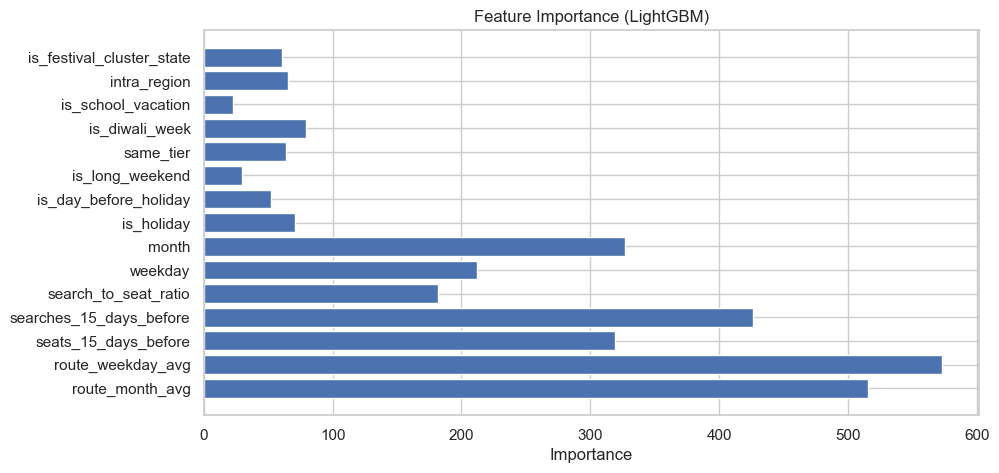

In [214]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 5))
plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (LightGBM)")
plt.show()

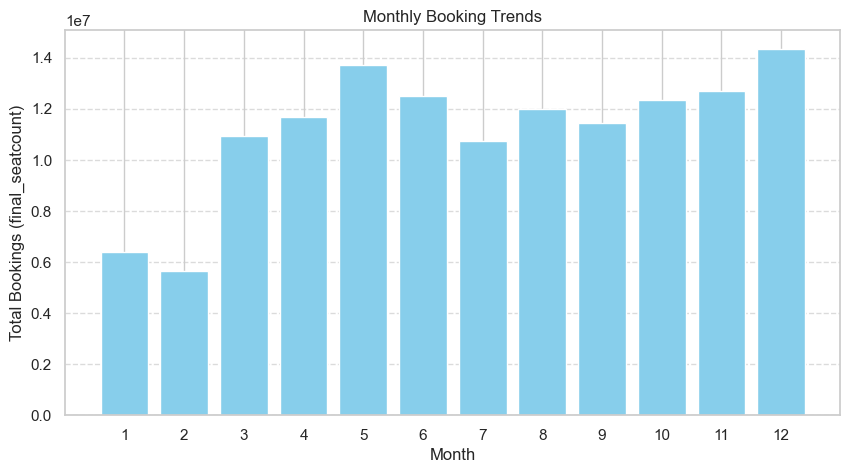

In [128]:
train_merged['month'] = train_merged['doj'].dt.month

monthly_bookings = train_merged.groupby('month')['final_seatcount'].sum().reset_index()
monthly_bookings.columns = ['Month', 'Total_Bookings']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(monthly_bookings['Month'], monthly_bookings['Total_Bookings'], color='skyblue')
plt.xlabel("Month")
plt.ylabel("Total Bookings (final_seatcount)")
plt.title("Monthly Booking Trends")
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [242]:
#training on test data

test['doj'] = pd.to_datetime(test['doj'])
dbd_15 = trans[trans['dbd'] == 15].copy()
dbd_15['doj'] = pd.to_datetime(dbd_15['doj'])

test_merged = pd.merge(test, dbd_15, on=['doj', 'srcid', 'destid'], how='left')

test_merged.isnull().sum()


route_key             0
doj                   0
srcid                 0
destid                0
doi                   0
srcid_region          0
destid_region         0
srcid_tier            0
destid_tier           0
cumsum_seatcount      0
cumsum_searchcount    0
dbd                   0
dtype: int64

In [240]:
test_merged.head()

,route_key,doj,srcid,destid,doi,srcid_region,destid_region,srcid_tier,destid_tier,seats_15_days_before,searches_15_days_before,dbd,weekday,month,search_to_seat_ratio
0,2025-02-11_46_45,2025-02-11,46,45,2025-01-27,Tamil Nadu,Karnataka,Tier 1,Tier 1,38.0,1082.0,15,1,2,2.847368e+01
1,2025-01-20_17_23,2025-01-20,17,23,2025-01-05,East 1,East 1,Tier2,Tier 1,0.0,1175.0,15,0,1,1.175000e+08
2,2025-01-08_02_14,2025-01-08,2,14,2024-12-24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,370.0,15,2,1,3.700000e+07
3,2025-01-08_08_47,2025-01-08,8,47,2024-12-24,Andhra Pradesh,Andhra Pradesh,Tier2,Tier 1,0.0,120.0,15,2,1,1.200000e+07
4,2025-01-08_09_46,2025-01-08,9,46,2024-12-24,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,39.0,1230.0,15,2,1,3.153845e+01


In [254]:
#feature engineering

# Calendar features
test_merged['doj'] = pd.to_datetime(test_merged['doj'])
test_merged['weekday'] = test_merged['doj'].dt.dayofweek
test_merged['month'] = test_merged['doj'].dt.month

# Ratio feature
test_merged['search_to_seat_ratio'] = test_merged['searches_15_days_before'] / (test_merged['seats_15_days_before'] + 1)

# Same tier
test_merged['same_tier'] = (test_merged['srcid_tier'] == test_merged['destid_tier']).astype(int)

# Intra region
test_merged['intra_region'] = (test_merged['srcid_region'] == test_merged['destid_region']).astype(int)

# School vacation
test_merged['is_school_vacation'] = test_merged['month'].isin([4, 5, 6, 12, 1]).astype(int)

# Holiday features (assuming you've already imported `holidays`)
indian_holidays = holidays.India(years=[2024, 2025])
test_merged['is_holiday'] = test_merged['doj'].isin(indian_holidays).astype(int)
test_merged['is_day_before_holiday'] = test_merged['doj'].apply(lambda x: (x + pd.Timedelta(days=1)) in indian_holidays).astype(int)
test_merged['is_long_weekend'] = test_merged['doj'].apply(
    lambda x: ((x - pd.Timedelta(days=1)) in indian_holidays and x.weekday() == 5) or
              ((x + pd.Timedelta(days=1)) in indian_holidays and x.weekday() == 4) or
              ((x - pd.Timedelta(days=2)) in indian_holidays and x.weekday() == 6) or
              ((x + pd.Timedelta(days=2)) in indian_holidays and x.weekday() == 5)
).astype(int)

# Festival cluster state (Tamil Nadu or Delhi during Oct-Nov)
test_merged['is_festival_cluster_state'] = (
    (test_merged['month'].isin([10, 11])) &
    (test_merged['srcid_region'].isin(['Tamil Nadu', 'Delhi']))
).astype(int)

# Diwali week
diwali_dates = pd.to_datetime([
    '2023-11-12', '2024-11-01'  # Adjust if other years are present
])
test_merged['is_diwali_week'] = test_merged['doj'].apply(
    lambda x: any(abs((x - d).days) <= 3 for d in diwali_dates)
).astype(int)

# 1. Compute route-level features from TRAIN data
route_month_avg = train_merged.groupby(['srcid', 'destid', 'month'])['final_seatcount'].mean().reset_index()
route_month_avg.rename(columns={'final_seatcount': 'route_month_avg'}, inplace=True)

route_weekday_avg = train_merged.groupby(['srcid', 'destid', 'weekday'])['final_seatcount'].mean().reset_index()
route_weekday_avg.rename(columns={'final_seatcount': 'route_weekday_avg'}, inplace=True)

# 2. Merge with TEST data
test_merged = pd.merge(test_merged, route_month_avg, on=['srcid', 'destid', 'month'], how='left')
test_merged = pd.merge(test_merged, route_weekday_avg, on=['srcid', 'destid', 'weekday'], how='left')

# Recalculate the ratio
test_merged['search_to_seat_ratio'] = test_merged['searches_15_days_before'] / (test_merged['seats_15_days_before'] + 1e-5)
test_merged['search_to_seat_ratio'] = test_merged['search_to_seat_ratio'].clip(upper=500)

/var/folders/d1/z6988h613vvdthdkgbg645gw0000gn/T/ipykernel_54800/3783051162.py:22: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  test_merged['is_holiday'] = test_merged['doj'].isin(indian_holidays).astype(int)


In [268]:
# Step 1: Drop all variants of route-level average columns if they exist
test_merged = test_merged.drop(
    columns=[
        'route_month_avg_x', 'route_weekday_avg_x',
        'route_month_avg_y', 'route_weekday_avg_y',
        'route_month_avg', 'route_weekday_avg'
    ],
    errors='ignore'
)

# Step 2: Merge cleanly ONCE using the grouped train features
# Make sure train_merged is already available and has final_seatcount
route_month_avg = train_merged.groupby(['srcid', 'destid', 'month'])['final_seatcount'].mean().reset_index()
route_month_avg.rename(columns={'final_seatcount': 'route_month_avg'}, inplace=True)

route_weekday_avg = train_merged.groupby(['srcid', 'destid', 'weekday'])['final_seatcount'].mean().reset_index()
route_weekday_avg.rename(columns={'final_seatcount': 'route_weekday_avg'}, inplace=True)

# Step 3: Merge back cleanly
test_merged = pd.merge(test_merged, route_month_avg, on=['srcid', 'destid', 'month'], how='left')
test_merged = pd.merge(test_merged, route_weekday_avg, on=['srcid', 'destid', 'weekday'], how='left')

print(test_merged.columns.tolist())


['route_key', 'doj', 'srcid', 'destid', 'doi', 'srcid_region', 'destid_region', 'srcid_tier', 'destid_tier', 'seats_15_days_before', 'searches_15_days_before', 'dbd', 'weekday', 'month', 'search_to_seat_ratio', 'same_tier', 'intra_region', 'is_school_vacation', 'is_holiday', 'is_day_before_holiday', 'is_long_weekend', 'is_festival_cluster_state', 'is_diwali_week', 'route_month_avg', 'route_weekday_avg']


In [272]:
features = [
    'route_month_avg', 'route_weekday_avg', 'seats_15_days_before', 'searches_15_days_before',
    'search_to_seat_ratio', 'weekday', 'month', 'is_holiday', 'is_day_before_holiday',
    'is_long_weekend', 'same_tier', 'is_diwali_week', 'is_school_vacation',
    'intra_region', 'is_festival_cluster_state'
]

X_test = test_merged[features]
test_preds = model.predict(X_test)
submission = pd.DataFrame({
    'route_key': test_merged['route_key'],
    'final_seatcount': test_preds
})
submission.to_csv("submission.csv", index=False)
